# Readfile

In [1]:
import numpy as np

electrode1 = np.loadtxt('Data.txt', usecols=0)
electrode2 = np.loadtxt('Data.txt', usecols=1)

print(electrode1)
print(electrode2)

[ 2.1283e-05  7.3701e-06 -9.3684e-06 ... -6.6963e-07 -6.8155e-06
 -9.6991e-06]
[3.9206e-06 1.5696e-06 4.5379e-06 ... 7.3604e-06 1.7338e-05 1.1950e-05]


Calculating the threshold
for the first 500 of each electrode

In [2]:
thres1 = np.std(electrode1[:501]) * 3.5
thres2 = np.std(electrode2[:501]) * 3.5

print(thres1)
print(thres2)

3.0182091492118355e-05
2.6560570090110783e-05


Comparing data from electrode with the threshold

In [5]:
window = []
peakSpike = []
markerIndex = []

for s in range(500, len(electrode1)):
    if electrode1[s] > thres1:
        window.append(electrode1[s])
    elif len(window) != 0:
        m = np.max(window)
        peakSpike.append(m)
        markerIndex.append(np.where(electrode1==m)[0][0])
        window.clear()

peakSpike = np.array(peakSpike)
print(peakSpike)
print(markerIndex)

[3.7131e-05 7.1877e-05 3.7991e-05 ... 3.0782e-05 6.6003e-05 3.6170e-05]
[746, 1794, 2026, 3237, 3676, 4181, 4537, 4762, 5313, 5586, 5619, 6076, 6167, 6263, 6637, 7044, 8183, 8279, 8710, 9245, 9401, 10469, 11370, 12624, 14095, 15655, 16749, 16775, 16799, 17598, 17694, 18700, 18731, 19757, 21498, 21538, 22706, 22792, 22953, 24653, 28121, 29649, 31690, 31843, 34649, 35880, 37959, 39706, 40828, 41988, 43312, 44297, 46635, 48021, 48045, 17598, 49540, 50140, 50861, 52038, 52434, 52463, 57891, 61390, 64203, 65068, 65398, 66947, 67188, 67823, 68390, 68429, 68502, 68574, 69594, 70267, 71546, 71704, 71746, 73315, 73360, 73365, 74199, 76206, 77189, 79409, 79438, 83782, 85038, 85347, 85886, 86763, 87196, 88066, 88598, 89069, 89798, 90773, 91148, 91512, 91907, 92500, 92530, 92585, 97180, 98181, 98445, 98471, 99582, 19757, 100204, 101373, 101456, 101871, 101892, 102696, 107303, 110541, 111713, 114499, 115091, 115996, 116390, 117541, 117567, 118168, 118455, 118807, 119352, 119374, 119507, 120272, 120

another way of doing it 

In [5]:
window = np.array([])
peakSpike = np.array([])

for s in range(500, len(electrode1)):
    if electrode1[s] > thres1:
        window = np.append(window, electrode1[s])
    elif len(window) != 0:
        peakSpike = np.append(peakSpike, np.max(window))
        window = np.array([])
        
print(peakSpike)

[3.7131e-05 7.1877e-05 3.7991e-05 ... 3.0782e-05 6.6003e-05 3.6170e-05]


Electrode2

In [6]:
window2 = []
peakSpike2 = []
markerIndex2 = []

for s in range(500, len(electrode2)):
    if electrode2[s] > thres2:
        window2.append(electrode2[s])
    elif len(window2) != 0:
        m = np.max(window2)
        peakSpike2.append(m)
        markerIndex2.append(np.where(electrode2==m)[0][0])
        window2.clear()

peakSpike2 = np.array(peakSpike2)
print(peakSpike2)
print(markerIndex2)

[4.3548e-05 2.7382e-05 3.7373e-05 ... 2.9285e-05 2.9020e-05 3.9951e-05]
[1815, 2838, 3543, 3547, 4386, 4415, 5658, 6521, 9084, 9867, 10979, 10983, 15164, 16914, 16972, 21674, 21971, 24082, 24564, 28205, 29040, 29893, 30972, 34573, 35897, 38628, 38633, 38727, 41074, 41677, 42320, 44445, 45259, 46417, 50926, 51325, 54627, 55009, 59615, 61764, 62931, 64076, 64648, 69174, 70229, 70317, 70631, 72882, 72886, 76598, 76634, 77148, 78706, 79323, 80188, 82543, 84120, 84988, 90301, 93134, 94813, 99841, 100274, 101610, 102188, 104437, 104811, 107358, 110667, 111926, 112482, 112772, 116419, 116574, 116920, 118032, 118071, 118115, 121100, 121483, 124650, 126432, 127678, 131526, 132453, 134333, 137251, 138525, 139529, 139534, 140457, 143820, 143825, 145132, 145787, 146122, 146971, 147760, 147908, 148603, 148945, 149067, 149783, 150227, 150341, 151588, 158222, 160643, 161783, 167200, 173281, 173307, 173314, 175028, 176261, 179295, 185735, 190277, 192085, 193473, 196686, 201061, 202271, 202732, 202829,

Getting 24 samples before and after peak

In [7]:
samplingRate = 24414
duration = 0.002
numSamples = int((samplingRate * duration) / 2)
print(numSamples)

samples = []
i = 0
for s in range(0, len(electrode1)):
    if  i != len(peakSpike) and electrode1[s] == peakSpike[i]:
        st = s - numSamples
        en = s + numSamples
        l = electrode1[st: en + 1]
        samples.append(l)
        i += 1
        
print(samples[0])

24
[ 5.1112e-06  9.1221e-06  9.7682e-06  1.1486e-05  1.2221e-05  7.9951e-06
  9.7925e-07 -2.2004e-06 -6.9878e-07 -2.4063e-06 -1.1869e-05 -2.0461e-05
 -1.7631e-05 -8.1313e-06 -5.8165e-06 -1.1496e-05 -1.1050e-05  1.1932e-06
  1.0442e-05  1.3963e-06 -1.7967e-05 -2.3742e-05 -5.3737e-06  2.2144e-05
  3.7131e-05  3.4082e-05  2.3289e-05  1.4605e-05  9.4946e-06  6.5179e-06
  6.3789e-06  9.4708e-06  1.3004e-05  1.3359e-05  9.5272e-06  2.9176e-06
 -4.4809e-06 -1.0676e-05 -1.4451e-05 -1.7040e-05 -2.1379e-05 -2.7710e-05
 -3.0818e-05 -2.4833e-05 -1.2162e-05 -3.9584e-06 -7.7573e-06 -1.7519e-05
 -2.1105e-05]


Electrode2

In [8]:
samplingRate = 24414
duration = 0.002
numSamples = int((samplingRate * duration) / 2)
print(numSamples)

samples2 = []
i = 0
for s in range(0, len(electrode2)):
    if  i != len(peakSpike2) and electrode2[s] == peakSpike2[i]:
        st = s - numSamples
        en = s + numSamples
        l = electrode2[st: en + 1]
        samples2.append(l)
        i += 1
        
print(samples2[0])

24
[-8.6100e-06 -7.0755e-06 -3.9110e-06 -6.4960e-07  1.4410e-06  2.7835e-06
  3.7980e-06  3.2982e-06  2.6726e-07 -3.6431e-06 -5.0803e-06 -2.4866e-06
  2.3107e-06  6.2865e-06  8.2635e-06  8.6431e-06  6.3058e-06 -2.1007e-06
 -1.7775e-05 -3.4280e-05 -3.8635e-05 -2.2269e-05  7.9175e-06  3.3790e-05
  4.3548e-05  4.1537e-05  3.8924e-05  3.9175e-05  3.6856e-05  2.8095e-05
  1.6503e-05  7.8539e-06  3.0214e-06 -1.4765e-06 -7.9055e-06 -1.4570e-05
 -1.8182e-05 -1.7042e-05 -1.1651e-05 -4.5583e-06 -5.6599e-07 -3.7366e-06
 -1.1767e-05 -1.6258e-05 -1.1854e-05 -3.6162e-06 -2.0180e-06 -1.0412e-05
 -2.0435e-05]


Extracting two features
For each spike, extract two features as follows:
• The standard deviation of the samples of the spike
• The maximum difference between two successive samples of the spike

In [9]:
peakFeature = []

# print(len(samples))
# x = samples[3]
# print(x)
# md = [x[i] - x[i-1] if i else x[i] for i in range(1, len(x))]
# print(np.max(md))

# sd = np.std(x)
# print(sd)

for x in samples:
    md = np.max([x[i] - x[i-1] if i else x[i] for i in range(1, len(x))])
    sd = np.std(x)
    peakFeature.append([sd, md])
    
print(peakFeature)    

[[1.537096425469696e-05, 2.75177e-05], [2.4519784468866324e-05, 5.361e-05], [1.3825748137138986e-05, 1.55191e-05], [1.4436116226965749e-05, 1.5576e-05], [1.3835297794351504e-05, 2.9811899999999998e-05], [2.8887690026677693e-05, 6.6095e-05], [1.3537637376469396e-05, 1.5943e-05], [1.9758954194960072e-05, 5.05074e-05], [2.267928799552433e-05, 5.71431e-05], [2.3094707105933813e-05, 5.3323e-05], [1.7982734597179217e-05, 1.9517899999999998e-05], [1.2406372859111443e-05, 1.30685e-05], [2.693650896868072e-05, 5.7282e-05], [1.5250484413785912e-05, 1.7276200000000002e-05], [2.1422483438169988e-05, 4.452e-05], [1.4906883588069681e-05, 2.47431e-05], [2.759585845954275e-05, 5.2479000000000004e-05], [1.2496749672208929e-05, 2.3040799999999998e-05], [2.264583464262997e-05, 4.8759e-05], [2.5319980589870695e-05, 5.5739e-05], [1.3957549263153223e-05, 1.60342e-05], [2.651779063371175e-05, 5.6797e-05], [2.1415131547091665e-05, 4.90517e-05], [1.0154892153261514e-05, 1.8191e-05], [3.0016423194412763e-05, 4.

Electrode2

In [10]:
peakFeature2 = []

for x in samples2:
    md = np.max([x[i] - x[i-1] if i else x[i] for i in range(1, len(x))])
    sd = np.std(x)
    peakFeature2.append([sd, md])
    
print(peakFeature2) 

[[1.8308320784188307e-05, 3.01865e-05], [1.1798239765527097e-05, 1.05115e-05], [1.8837849010999758e-05, 3.4019e-05], [1.8823092635045748e-05, 3.4019e-05], [2.1577909487770906e-05, 3.41184e-05], [2.1083278660314632e-05, 3.41184e-05], [1.0262959700366752e-05, 2.7811999999999997e-05], [1.706086500730726e-05, 3.3486e-05], [1.0708813721015907e-05, 1.43132e-05], [2.009282124666287e-05, 3.1204430000000004e-05], [1.4802644273969009e-05, 2.46005e-05], [1.489955821214839e-05, 2.46005e-05], [1.0972864054788066e-05, 1.75981e-05], [1.2714076925581963e-05, 1.52426e-05], [1.9608660876840106e-05, 4.4728e-05], [1.7284063708388468e-05, 3.5823e-05], [9.37368488716156e-06, 1.5864899999999998e-05], [1.5078054873717985e-05, 2.3584e-05], [9.719623040225843e-06, 1.3304299999999999e-05], [8.714822540546442e-06, 1.11654e-05], [7.603290406826233e-06, 1.4086300000000001e-05], [9.49988510008909e-06, 1.2710999999999999e-05], [1.2275114658545845e-05, 1.1769000000000002e-05], [1.733782828836036e-05, 3.1117e-05], [1.1

Plotting the points

K means = 2 or 3

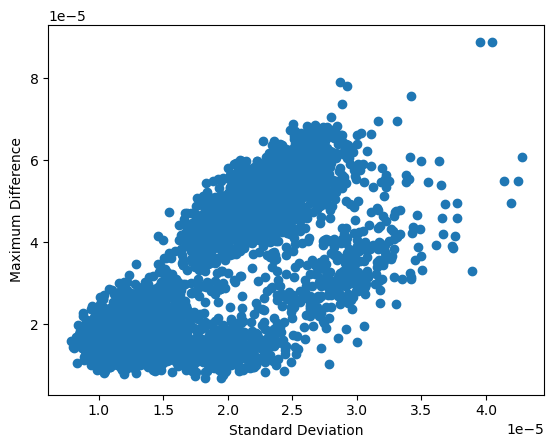

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = [x[0] for x in peakFeature]
y= [y[1] for y in peakFeature]
plt.xlabel("Standard Deviation")
plt.ylabel("Maximum Difference")

plt.plot(x, y, 'o')

Electrode2

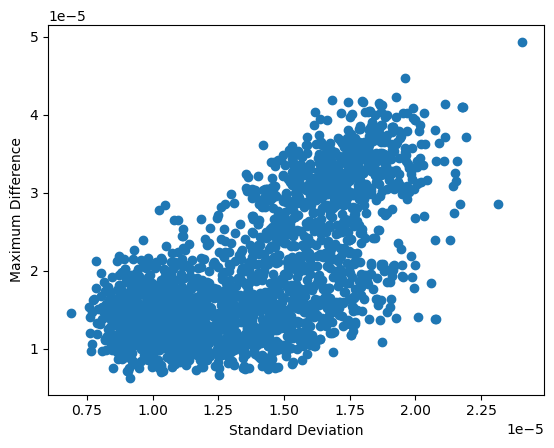

In [12]:
x2 = [x[0] for x in peakFeature2]
y2 = [y[1] for y in peakFeature2]
plt.xlabel("Standard Deviation")
plt.ylabel("Maximum Difference")

plt.plot(x2, y2, 'o')

Elbow method is utilized to visualize the intertia for different values of K

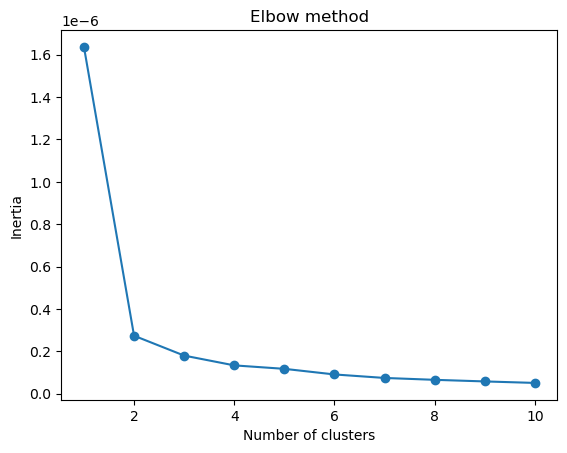

In [14]:
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Electrode2

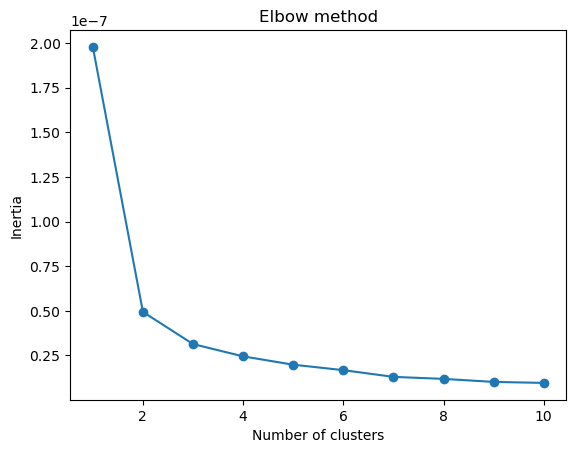

In [15]:
data2 = list(zip(x2, y2))
inertias2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i, n_init='auto')
    kmeans2.fit(data2)
    inertias2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertias2, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Kmeans Clustring 

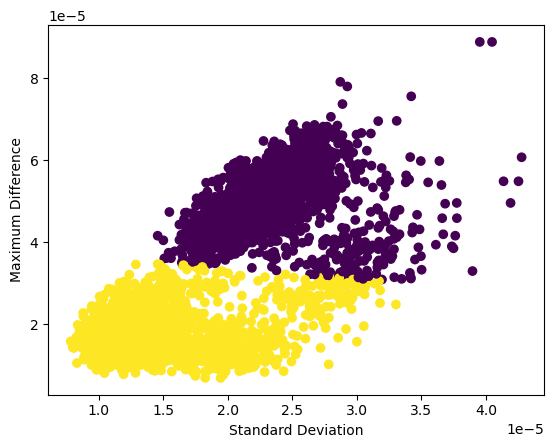

In [24]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel("Standard Deviation")
plt.ylabel("Maximum Difference")
plt.show()

Electrode2

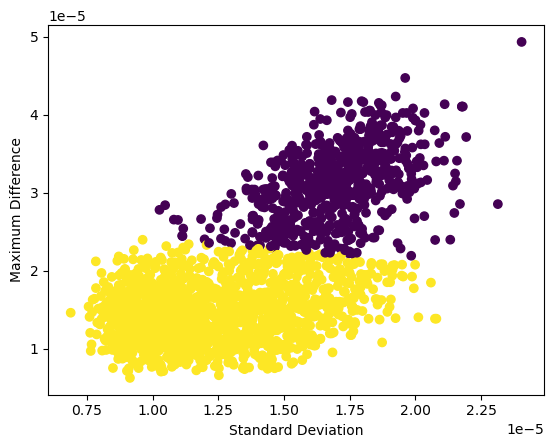

In [37]:
kmeans2 = KMeans(n_clusters=2, n_init='auto').fit(data2)

plt.scatter(x2, y2, c=kmeans2.labels_)
plt.xlabel("Standard Deviation")
plt.ylabel("Maximum Difference")
plt.show()

Ploting the spikes for electrode1

[1 0 1 ... 1 0 1]
4782


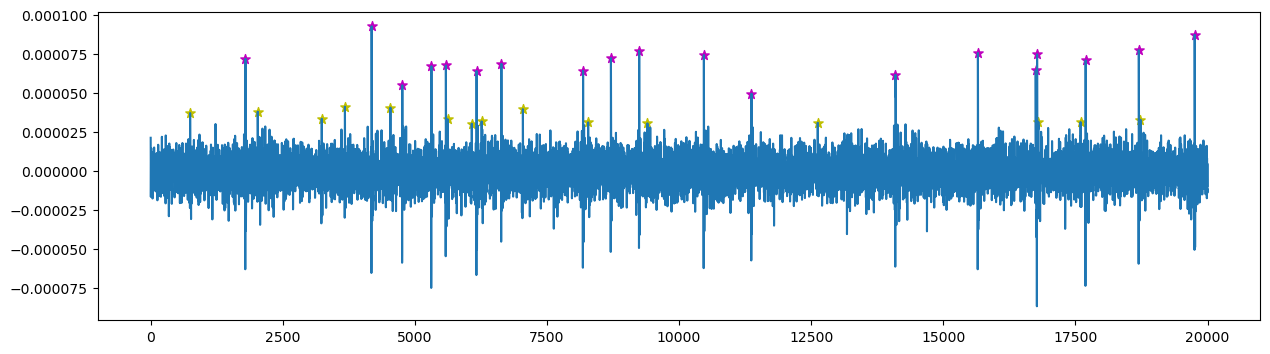

In [41]:
k = kmeans.labels_
print(k)
print(len(k))

plt.figure(figsize=(15,4))
colors = []

x_values = range(20001)        
plt.plot(x_values, electrode1[:20001], linestyle='-')
j = 0
for i in markerIndex:
    if i <= 20000:
        if k[j] == 0:
            plt.scatter(i, electrode1[i], marker='*', color='m', s=50)   
            
        elif k[j] == 1:
            plt.scatter(i, electrode1[i], marker='*', color='y', s=50)
        j+=1
    else:
        break
        
      
plt.show()

Plotting spikes for electrode2

[0 1 0 ... 1 1 1]
2265
0 , 1815 , 4.3548e-05
1 , 2838 , 2.7382e-05
0 , 3543 , 3.7373e-05
0 , 3547 , 2.9108e-05
0 , 4386 , 3.5827e-05
0 , 4415 , 3.2123e-05
0 , 5658 , 3.1216e-05
0 , 6521 , 3.9009e-05
1 , 9084 , 3.0603e-05
0 , 9867 , 5.1249e-05
0 , 10979 , 2.7032e-05
0 , 10983 , 2.8041e-05
1 , 15164 , 2.7485e-05
1 , 16914 , 2.8871e-05
0 , 16972 , 5.7159e-05


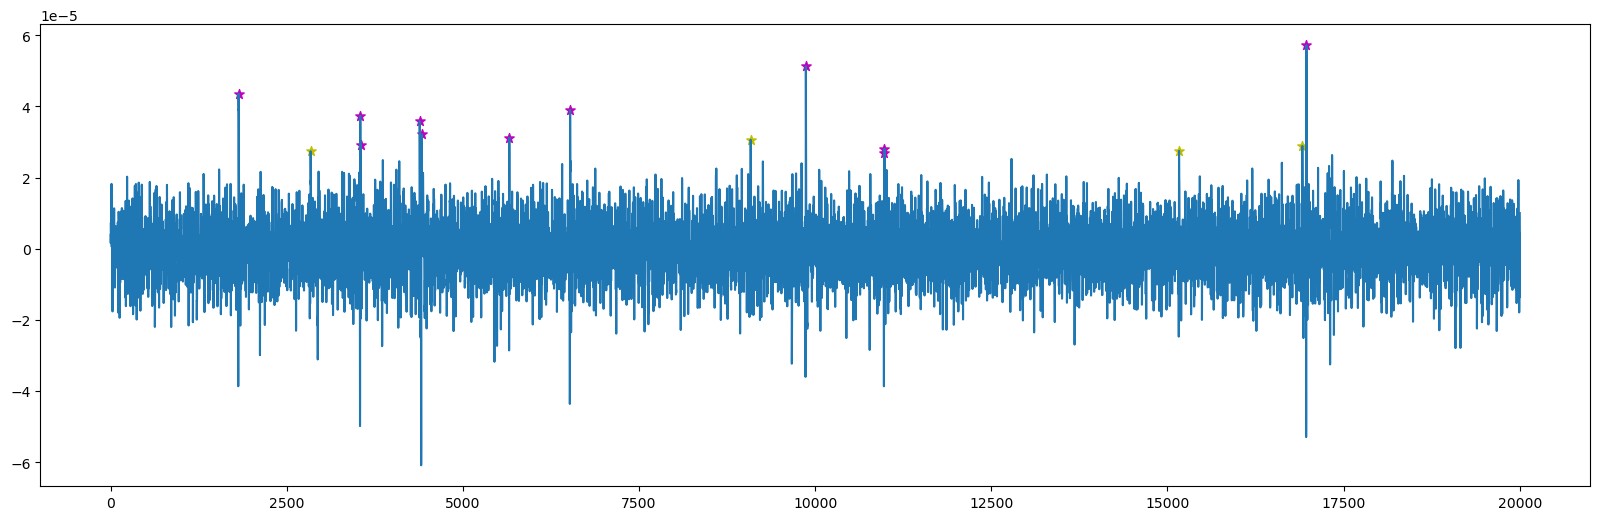

In [64]:
k2 = kmeans2.labels_
print(k2)
print(len(k2))


fig = plt.figure(figsize=(20,6))
colors = []

# j=0
# for i in k2:
#     print(k2[j], end=" ")
#     j+=1

x_values = range(20001)        
plt.plot(x_values, electrode2[:20001], linestyle='-')
j = 0
for i in markerIndex2:
    if i <= 20000:
        print(k2[j],",", i, ",", electrode2[i])
        if k2[j] == 0:
            plt.scatter(i, electrode2[i], marker='*', color='m', s=50)   
            
        elif k2[j] == 1:
            plt.scatter(i, electrode2[i], marker='*', color='y', s=50)
        j+=1
    else:
        break
        
# spacing = 0.0000000000001
# fig.subplots_adjust(bottom=spacing) 
plt.show()

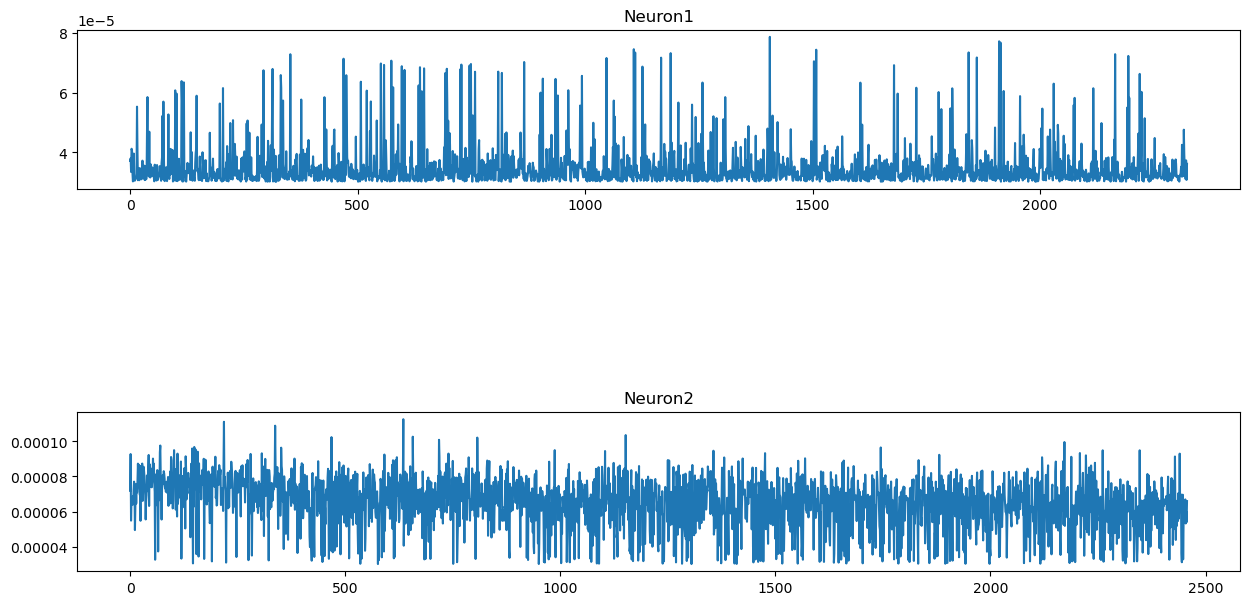

In [17]:
j = 0
avg1 = []
avg2 = []  
for i in markerIndex:
    if k[j] == 0:
        avg1.append(electrode1[i])
    elif k[j] == 1:
        avg2.append(electrode1[i])  
    j+=1
    
    
plt.figure(figsize=(15, 12))

plt.subplot(511)
plt.title("Neuron1")
plt.plot(avg1, )

plt.subplot(513)
plt.title("Neuron2")
plt.plot(avg2)
plt.show()

Electrode2

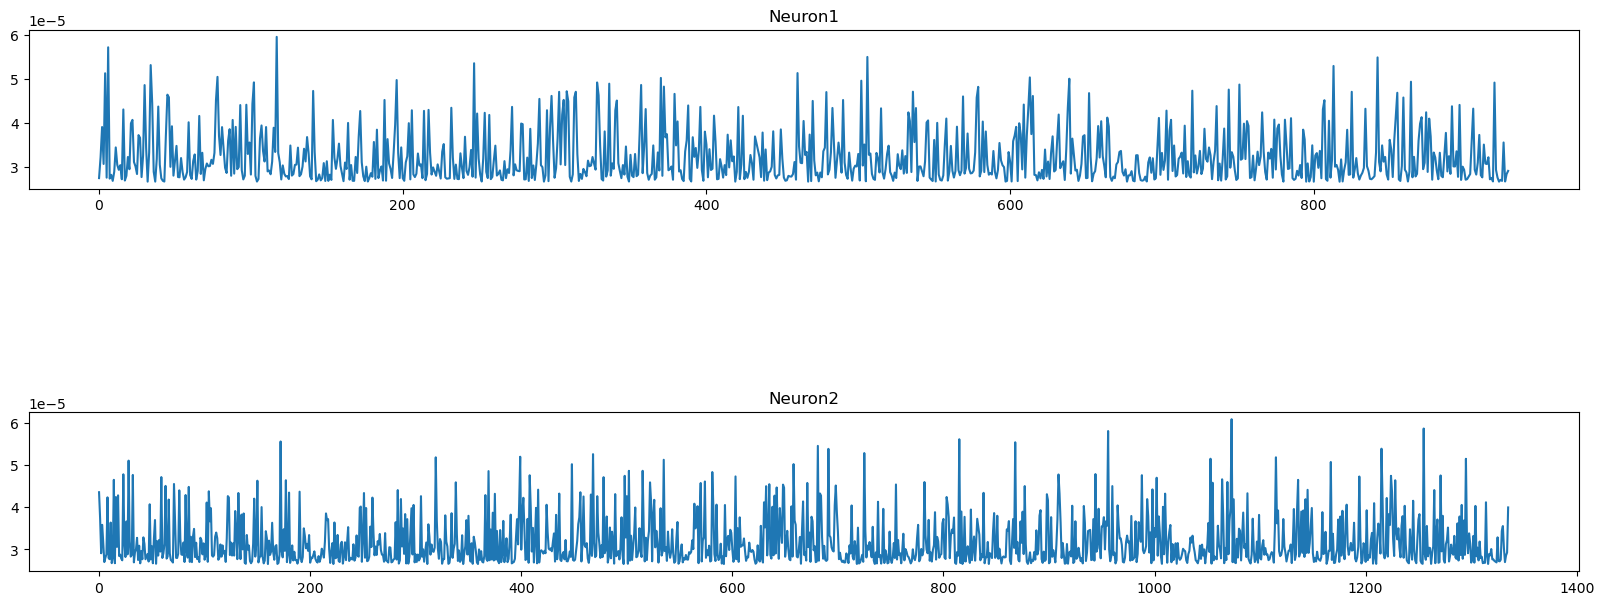

In [63]:
j = 0
avg1 = []
avg2 = []  
for i in markerIndex2:
    if k[j] == 0:
        avg1.append(electrode2[i])
    elif k[j] == 1:
        avg2.append(electrode2[i])  
    j+=1
    
    
plt.figure(figsize=(20, 12))

plt.subplot(511)
plt.title("Neuron1")
plt.plot(avg1)

plt.subplot(513)
plt.title("Neuron2")
plt.plot(avg2)
plt.show()